In [152]:
import os
import numpy as np
from python_speech_features import mfcc
from scipy.io import wavfile
from scipy import spatial
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import librosa

/usr/local/lib/python2.7/dist-packages/numba/errors.py:137: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)
/usr/local/lib/python2.7/dist-packages/librosa/__init__.py:35: FutureWarning: You are using librosa with Python 2. Please note that librosa 0.7 will be the last version to support Python 2, after which it will require Python 3 or later.
  FutureWarning)


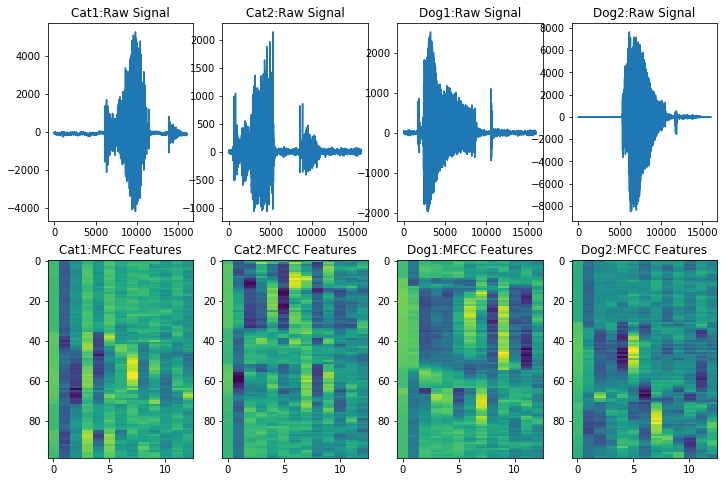

In [4]:
dataset_path = './speech_dataset/'
cat1= './speech_dataset/cat/004ae714_nohash_0.wav'
cat2 = './speech_dataset/cat/00f0204f_nohash_1.wav'
dog1 = './speech_dataset/dog/00f0204f_nohash_1.wav'
dog2 = './speech_dataset/dog/03c96658_nohash_0.wav'


#raw signals
rate1, signal1 = wavfile.read(cat1)
rate2, signal2 = wavfile.read(cat2)
rate3, signal3 = wavfile.read(dog1)
rate4, signal4 = wavfile.read(dog2)

#mfcc
mfcc_cat1 = mfcc(signal1, rate1)
mfcc_cat2 = mfcc(signal2, rate2)
mfcc_dog1 = mfcc(signal3, rate3)
mfcc_dog2 = mfcc(signal4, rate4)

##View raw signal
fig, ax = plt.subplots(2,4)
fig.set_size_inches(12,8)
fig.set_facecolor('w')

#Cat1
ax[0,0].plot(signal1)
ax[0,0].set_title("Cat1:Raw Signal")
ax[1,0].imshow(mfcc_cat1, aspect='auto')
ax[1,0].set_title("Cat1:MFCC Features")

#Cat2
ax[0,1].plot(signal2)
ax[0,1].set_title("Cat2:Raw Signal")
ax[1,1].imshow(mfcc_cat2, aspect='auto')
ax[1,1].set_title("Cat2:MFCC Features")

#Dog1
ax[0,2].plot(signal3)
ax[0,2].set_title("Dog1:Raw Signal")
ax[1,2].imshow(mfcc_dog1, aspect='auto')
ax[1,2].set_title("Dog1:MFCC Features")

#Dog2
ax[0,3].plot(signal4)
ax[0,3].set_title("Dog2:Raw Signal")
ax[1,3].imshow(mfcc_dog2, aspect='auto')
ax[1,3].set_title("Dog2:MFCC Features")

plt.show()

In [5]:
def sum_convolution(feats_1, feats_2):
    return sum(np.convolve(feats_1, feats_2))

In [38]:
def convolution(feats_1, feats_2):
    conv = []
    for i in range(len(feats_1)):
        conv.append(np.convolve(feats_1[i], feats_2[i]))
    return conv

In [7]:
def cosine_distance(feats_1, feats_2):
    dist = []
    for i in range(len(feats_1)):
        dist.append(spatial.distance.cosine(feats_1[i], feats_2[i]))
    return dist

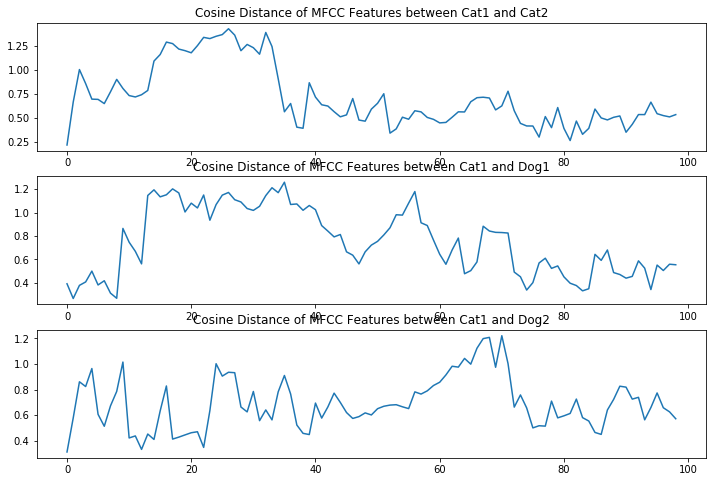

In [8]:
fig,ax = plt.subplots(3)
fig.set_facecolor('w')
fig.set_size_inches(12,8)

dist_cat2 = cosine_distance(mfcc_cat1, mfcc_cat2)
dist_dog1 = cosine_distance(mfcc_cat1, mfcc_dog1)
dist_dog2 = cosine_distance(mfcc_cat1, mfcc_dog2)

ax[0].plot(dist_cat2)
ax[0].set_title('Cosine Distance of MFCC Features between Cat1 and Cat2')
ax[1].plot(dist_dog1)
ax[1].set_title('Cosine Distance of MFCC Features between Cat1 and Dog1')
ax[2].plot(dist_dog2)
ax[2].set_title('Cosine Distance of MFCC Features between Cat1 and Dog2')

plt.show()

In [9]:
def euclidean_dist(feats_1, feats_2):
    dist = []
    for i in range(len(feats_1)):
        a = feats_1[i]
        b = feats_2[i]
        dist.append(np.linalg.norm(a-b))
    return dist
    

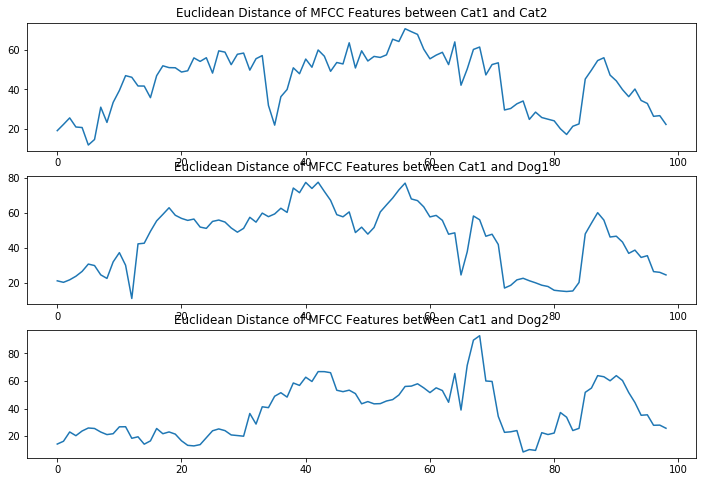

In [29]:
fig,ax = plt.subplots(3)
fig.set_facecolor('w')
fig.set_size_inches(12,8)

dist_cat2 = euclidean_dist(mfcc_cat1[:,:5], mfcc_cat2[:,:5])
dist_dog1 = euclidean_dist(mfcc_cat1[:,:5], mfcc_dog1[:,:5])
dist_dog2 = euclidean_dist(mfcc_cat1[:,:5], mfcc_dog2[:,:5])

ax[0].plot(dist_cat2)
ax[0].set_title('Euclidean Distance of MFCC Features between Cat1 and Cat2')
ax[1].plot(dist_dog1)
ax[1].set_title('Euclidean Distance of MFCC Features between Cat1 and Dog1')
ax[2].plot(dist_dog2)
ax[2].set_title('Euclidean Distance of MFCC Features between Cat1 and Dog2')

plt.show()

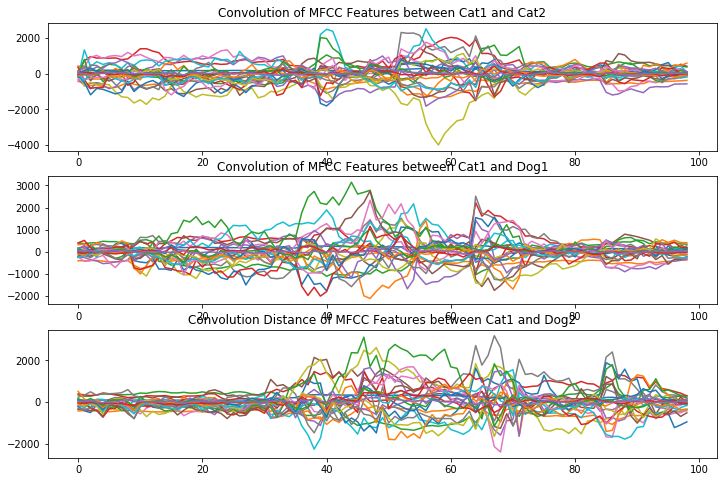

In [39]:
fig,ax = plt.subplots(3)
fig.set_facecolor('w')
fig.set_size_inches(12,8)

conv_cat2 = convolution(mfcc_cat1, mfcc_cat2)
conv_dog1 = convolution(mfcc_cat1, mfcc_dog1)
conv_dog2 = convolution(mfcc_cat1, mfcc_dog2)

ax[0].plot(conv_cat2)
ax[0].set_title('Convolution of MFCC Features between Cat1 and Cat2')
ax[1].plot(conv_dog1)
ax[1].set_title('Convolution of MFCC Features between Cat1 and Dog1')
ax[2].plot(conv_dog2)
ax[2].set_title('Convolution Distance of MFCC Features between Cat1 and Dog2')

plt.show()

In [43]:
def correlation(feats_1, feats_2):
    corr = []
    for i in range(len(feats_1)):
        corr.append(np.corrcoef(feats_1[i], feats_2[i])[1,0])
    return corr

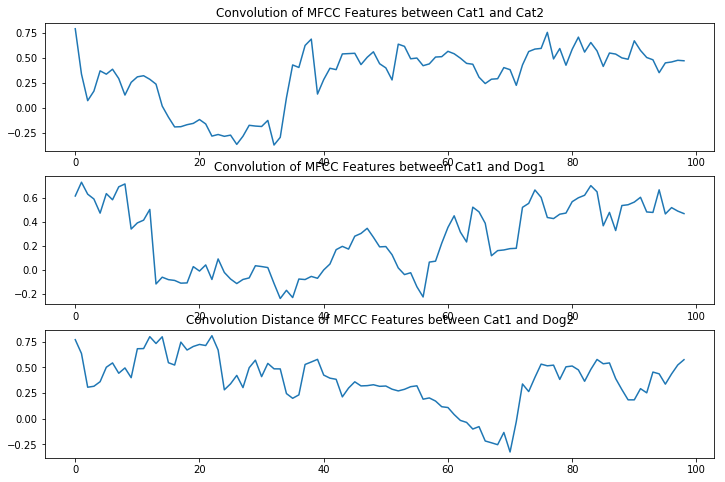

In [44]:
fig,ax = plt.subplots(3)
fig.set_facecolor('w')
fig.set_size_inches(12,8)

conv_cat2 = correlation(mfcc_cat1, mfcc_cat2)
conv_dog1 = correlation(mfcc_cat1, mfcc_dog1)
conv_dog2 = correlation(mfcc_cat1, mfcc_dog2)

ax[0].plot(conv_cat2)
ax[0].set_title('Convolution of MFCC Features between Cat1 and Cat2')
ax[1].plot(conv_dog1)
ax[1].set_title('Convolution of MFCC Features between Cat1 and Dog1')
ax[2].plot(conv_dog2)
ax[2].set_title('Convolution Distance of MFCC Features between Cat1 and Dog2')

plt.show()

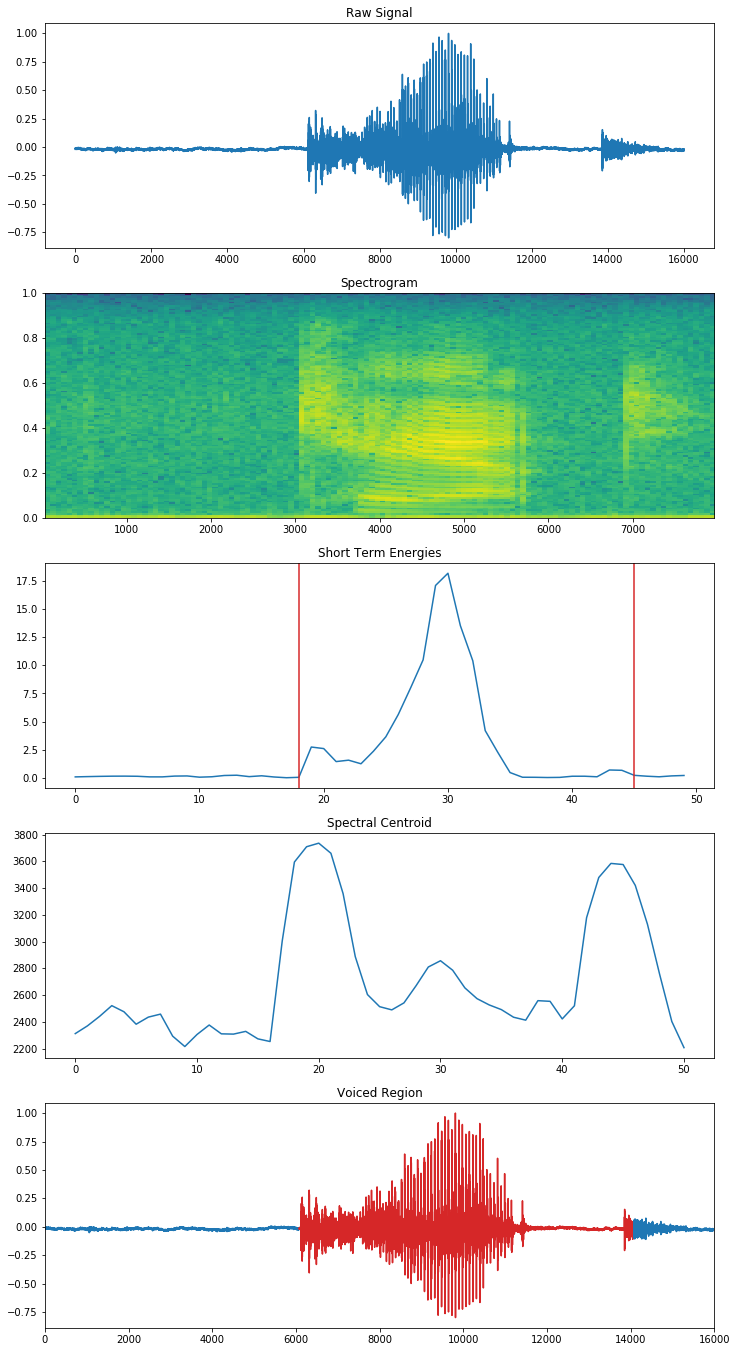

In [183]:
cat1= './speech_dataset/cat/004ae714_nohash_0.wav'

fs, signal = wavfile.read(cat1)

signal = signal/float(max(abs(signal)))
spg = spectrogram(signal)

sampsPerMilli = int(fs / 1000)
millisPerFrame = 20
sampsPerFrame = sampsPerMilli * millisPerFrame
nFrames = int(len(signal) / sampsPerFrame)

#short term energy
STEs = []  
for k in range(nFrames):
    startIdx = k * sampsPerFrame
    stopIdx = startIdx + sampsPerFrame
    window = np.zeros(signal.shape)
    window[startIdx:stopIdx] = 1
    ste = sum((signal ** 2) * (window ** 2))
    STEs.append(ste)

#Find voiced signal
voiced = 0
i_start = 0
i_end = 0
STEthresh = 0.3
for i in range(len(STEs)):
    ste = STEs[i]
    
    if ste > STEthresh:
        if not voiced:
            i_start = i
            voiced=1
        i_end = i

start =signal[:i_start*sampsPerFrame]
end =signal[i_end*sampsPerFrame:]
voiced = signal[i_start*sampsPerFrame:i_end*sampsPerFrame]

spectralCentroid = librosa.feature.spectral_centroid(signal,sr=fs, hop_length=len(signal)/nFrames)

fig, ax = plt.subplots(5)
fig.set_facecolor('w')
fig.set_size_inches(12,24)

ax[0].plot(signal)
ax[0].set_title('Raw Signal')

ax[1].specgram(signal, Fs=2)
ax[1].set_title('Spectrogram')

ax[2].plot(STEs)
ax[2].set_title('Short Term Energies')
ax[2].axvline(i_start-1, color='C3')
ax[2].axvline(i_end+1, color='C3')

ax[3].plot(spectralCentroid[0])
ax[3].set_title('Spectral Centroid')

x = np.arange(len(signal))
ax[4].set_xlim(0,len(signal))
ax[4].plot(x[0:i_start*sampsPerFrame],start)
ax[4].plot(x[i_start*sampsPerFrame:i_end*sampsPerFrame],voiced, color='C3')
ax[4].plot(x[i_end*sampsPerFrame:],end, color = 'C0')
ax[4].set_title("Voiced Region")

plt.show()

In [175]:
len(spectralCentroid[0])

16001

In [179]:
nFrames

50